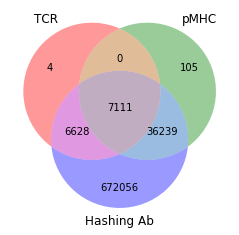

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_unweighted
from matplotlib_venn import venn2

# # Load
df = pd.read_csv("../experiments/exp13/run1_archive/brc/augmented/brc.csv") #snakemake.input[0])
tcr_df = pd.read_csv("../experiments/exp13/run1_archive/tcr/augmented/tcr.clean.augmented.csv") #pd.read_csv(snakemake.input[1])

#label = snakemake.params.label
#
#if 'tot' not in label:
#    l = 1 if 'pos' in label else 0
#    tcr_df = tcr_df[tcr_df.label == l].copy()

# # Split data
gem_tcr = tcr_df.gem
gem_mhc = df[df.umi_count_mhc.notnull()].gem #df.template_id_mhc.notnull()
gem_cd8 = df[df.umi_count_cd8.notnull()].gem #df.template_id_cd8.notnull()

# # Plot
a, b, c = set(gem_tcr), set(gem_mhc), set(gem_cd8)

ab = a.intersection(b)
ac = a.intersection(c)
bc = b.intersection(c)

abc = len(ab.intersection(c))
ab_c = len(ab) - abc
ac_b = len(ac) - abc
bc_a = len(bc) - abc
a_bc = len(a) - ab_c - ac_b - abc
b_ac = len(b) - ab_c - bc_a - abc
c_ab = len(c) - ac_b - bc_a - abc

venn3_unweighted(subsets = (a_bc, b_ac, ab_c, c_ab, ac_b, bc_a, abc), set_labels = ('TCR', 'pMHC', 'Hashing Ab'))
title = "GEMs containing TCR, pMHC, and/or Ab BCs"
#plt.title(title)
plt.savefig('venn_unweighted.png', bbox_inches='tight')
plt.show()

